# Machine Learning Classification Model

## Load the data

In [45]:
import pandas as pd

df = pd.read_excel('data/Microsoft_LinkedIn_Processed.xlsx', parse_dates=['Date'], index_col=0)
df

,Open,High,Low,Close,Volume,change_tommorow,change_tommorow_direction
Date,,,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,21220800,1.549141,UP
2016-12-09,61.180000,61.990002,61.130001,61.970001,27349400,0.321694,UP
2016-12-12,61.820000,62.299999,61.720001,62.169998,20198100,1.286125,UP
2016-12-13,62.500000,63.419998,62.240002,62.980000,35718900,-0.478620,DOWN
2016-12-14,63.000000,63.450001,62.529999,62.680000,30352700,-0.159793,DOWN
...,...,...,...,...,...,...,...
2024-07-23,443.899994,448.390015,443.100006,444.850006,13107100,-3.718818,DOWN
2024-07-24,440.450012,441.480011,427.589996,428.899994,26805800,-2.509560,DOWN
2024-07-25,428.799988,429.799988,417.510010,418.399994,29943800,1.615443,UP


## Machine Learning Model

### Separate the data

1. Target: which variable do you want to predict?
2. Explanatory: which variables will you use to calculate the prediction?

In [44]:
target = df.change_tommorow_direction.copy()
target

Date
2016-12-08      UP
2016-12-09      UP
2016-12-12      UP
2016-12-13    DOWN
2016-12-14    DOWN
              ... 
2024-07-23    DOWN
2024-07-24    DOWN
2024-07-25      UP
2024-07-26      UP
2024-07-29    DOWN
Name: change_tommorow_direction, Length: 1920, dtype: object

In [35]:
explanatory = df.drop(columns=['change_tommorow', 'change_tommorow_direction'])
explanatory

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,21220800
2016-12-09,61.180000,61.990002,61.130001,61.970001,27349400
2016-12-12,61.820000,62.299999,61.720001,62.169998,20198100
2016-12-13,62.500000,63.419998,62.240002,62.980000,35718900
2016-12-14,63.000000,63.450001,62.529999,62.680000,30352700
...,...,...,...,...,...
2024-07-23,443.899994,448.390015,443.100006,444.850006,13107100
2024-07-24,440.450012,441.480011,427.589996,428.899994,26805800
2024-07-25,428.799988,429.799988,417.510010,418.399994,29943800


### Compute the model

The following Python code will compute the numbers of the mathematical equation that we will use to calculate if the ticker goes UP or DOWN.

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
model_dt = DecisionTreeClassifier(max_depth=20)

In [58]:
model_dt.fit(X=explanatory, y=target)

DecisionTreeClassifier(max_depth=20)

In [39]:
target

Date
2016-12-08      UP
2016-12-09      UP
2016-12-12      UP
2016-12-13    DOWN
2016-12-14    DOWN
              ... 
2024-07-23    DOWN
2024-07-24    DOWN
2024-07-25      UP
2024-07-26      UP
2024-07-29    DOWN
Name: change_tommorow_direction, Length: 1920, dtype: object

### Visualize the model

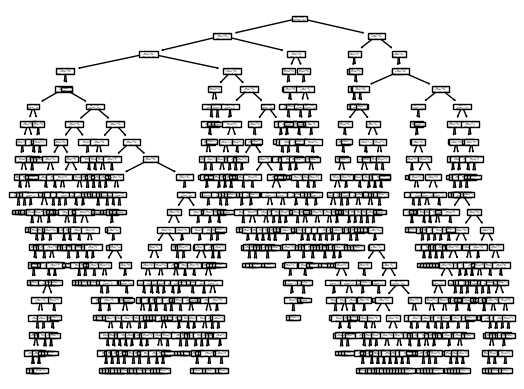

In [59]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_);

### Calculate the predictions

In [60]:
y_pred = model_dt.predict(X=explanatory)
y_pred

array(['UP', 'UP', 'UP', ..., 'UP', 'UP', 'DOWN'], dtype=object)

In [61]:
df_predictions = df[['change_tommorow_direction']].copy()
df_predictions['predictions'] = y_pred
df_predictions

,change_tommorow_direction,predictions
Date,,
2016-12-08,UP,UP
2016-12-09,UP,UP
2016-12-12,UP,UP
2016-12-13,DOWN,DOWN
2016-12-14,DOWN,DOWN
...,...,...
2024-07-23,DOWN,DOWN
2024-07-24,DOWN,DOWN
2024-07-25,UP,UP


### Evaluate the model: compare predictions with the reality

In [63]:
comp = df_predictions.change_tommorow_direction == df_predictions.predictions
comp.sum()/len(comp)

0.9114583333333334

In [62]:
model_dt.score(X=explanatory, y=target)

0.9114583333333334

## Save the model into a file

- We'll write the numbers of the Decision Tree's mathematical equation into a file.

In [65]:
import pickle

In [66]:
with open('models/model_dt_classification.pkl', 'wb') as f:
    pickle.dump(model_dt, f)